In [2]:
import numpy as np
import pandas as pd
import tabulate

# Load Data and Scenario

In [3]:
%load_ext autoreload
%autoreload 2

from fedimpute.data_prep import load_data, display_data
data, data_config = load_data("codrna")
display_data(data)
print("Data Dimensions: ", data.shape)
print("Data Config:\n", data_config)

+--------+--------+--------+--------+--------+--------+--------+--------+--------+
|   X1   |   X2   |   X3   |   X4   |   X5   |   X6   |   X7   |   X8   |   y    |
|--------+--------+--------+--------+--------+--------+--------+--------+--------|
| 0.7554 | 0.1364 | 0.0352 | 0.4132 | 0.6937 | 0.1591 | 0.3329 | 0.7154 | 1.0000 |
| 0.7334 | 0.7879 | 0.3819 | 0.3693 | 0.5619 | 0.4830 | 0.4351 | 0.5160 | 0.0000 |
| 0.7752 | 0.1364 | 0.1761 | 0.3290 | 0.7410 | 0.4259 | 0.4644 | 0.5268 | 1.0000 |
| 0.5905 | 0.7424 | 0.2720 | 0.2898 | 0.6920 | 0.3205 | 0.4019 | 0.6290 | 1.0000 |
| 0.7366 | 0.1212 | 0.2465 | 0.3290 | 0.7410 | 0.3249 | 0.5086 | 0.5631 | 1.0000 |
+--------+--------+--------+--------+--------+--------+--------+--------+--------+
Data Dimensions:  (5000, 9)
Data Config:
 {'target': 'y', 'task_type': 'classification', 'natural_partition': False}


In [4]:
%load_ext autoreload
%autoreload 2
from fedimpute.scenario import ScenarioBuilder

scenario_builder = ScenarioBuilder()
scenario_data = scenario_builder.create_simulated_scenario(
    data, data_config, num_clients = 4, dp_strategy='iid-even', ms_scenario='mnar-heter'
)
scenario_builder.summarize_scenario()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Missing data simulation...
Scenario Summary
Total clients: 4
Global Test Data: (500, 9)
Missing Mechanism Category: MNAR (Self Masking Logit)
Clients Data Summary:
     Train     Test      Miss     MS Ratio    MS Feature    Seed
--  --------  -------  --------  ----------  ------------  ------
C1  (1125,9)  (113,9)  (1125,8)     0.47         8/8        6077
C2  (1125,9)  (113,9)  (1125,8)     0.51         8/8        577
C3  (1125,9)  (113,9)  (1125,8)     0.46         8/8        7231
C4  (1125,9)  (113,9)  (1125,8)     0.47         8/8        5504



# Benchmarking Pipeline

In [6]:
%load_ext autoreload
%autoreload 2
from fedimpute.pipeline import FedImputePipeline

pipeline = FedImputePipeline()
pipeline.setup(
    id = 'benchmark_demo',
    fed_imp_configs = [
        ('em', ['local', 'fedem'], {}, [{}, {}]),
        ('mice', ['local', 'fedmice'], {}, [{}, {}]),
        ('gain', ['local', 'fedavg'], {}, [{}, {}]),
    ],
    persist_data = False,
    description = 'benchmark demonstration'
)

pipeline.pipeline_setup_summary()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Experiment ID: benchmark_demo
Description: benchmark demonstration
Persist Data: False
Evaluation: ['imp_quality', 'local_pred', 'fed_pred']
Seed: 100330201
--------------------------------------------------------------
    Imputer    Fed Strategy    Imp Params    Strategy Params
--  ---------  --------------  ------------  -----------------
 0  em         local           {}            {}
 1  em         fedem           {}            {}
 2  mice       local           {}            {}
 3  mice       fedmice         {}            {}
 4  gain       local           {}            {}
 5  gain       fedavg          {}            {}



In [ ]:
pipeline.run_pipeline(
    scenario_builder, repeats = 5, verbose = 0
)

## Result Analysis

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='arial')
plt.rc('pdf', fonttype = 42)
plt.rc('ps', fonttype = 42)

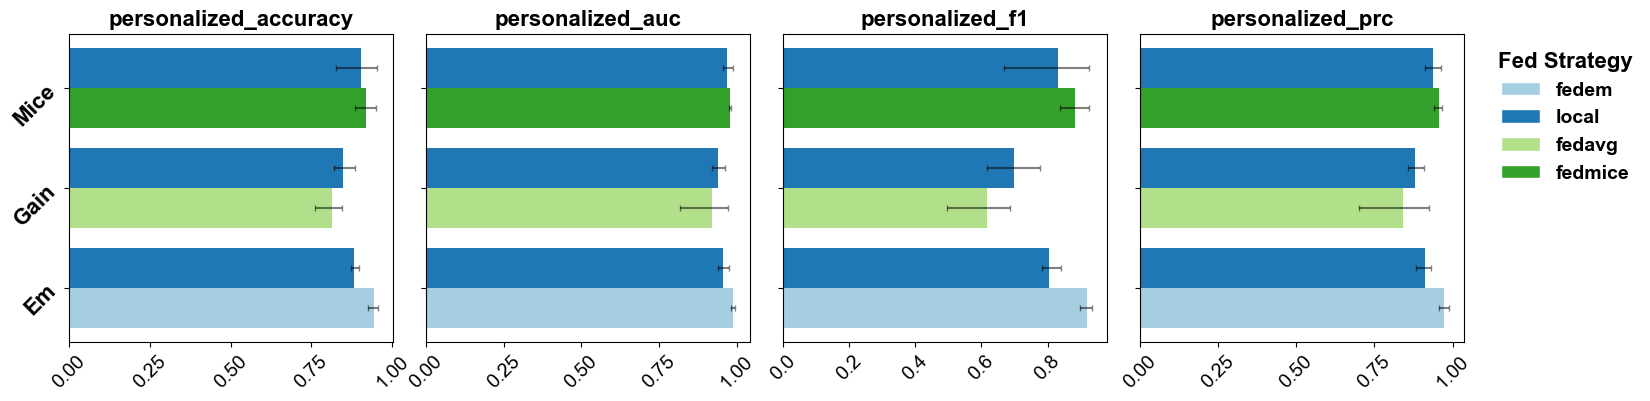

In [13]:
pipeline.plot_pipeline_results(
    metric_aspect = 'fed_pred_personalized',
    plot_type = 'bar',
    save_path = "./plots/benchmark_fedpred.pdf"  
)

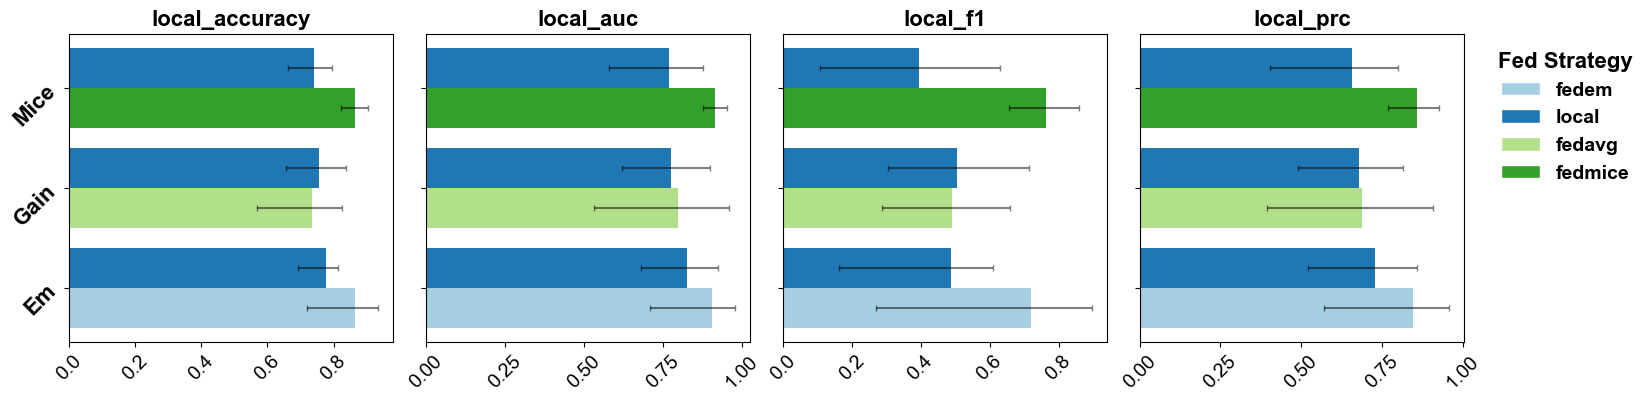

In [14]:
pipeline.plot_pipeline_results(
    metric_aspect = 'local_pred',    
    plot_type = 'bar',
    save_path = "./plots/benchmark_localpred.pdf"  
)

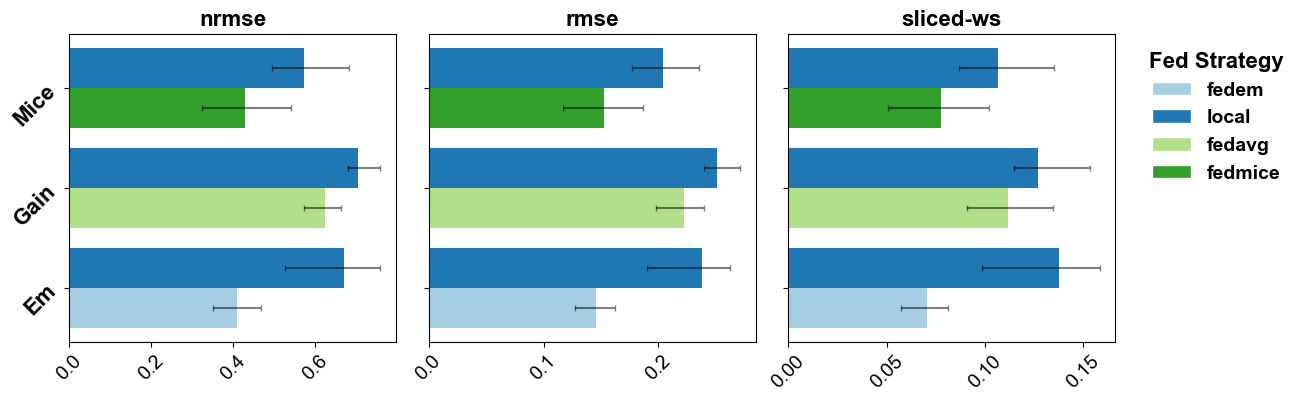

In [15]:
pipeline.plot_pipeline_results(
    metric_aspect = 'imp_quality',    
    plot_type = 'bar',
    save_path = "./plots/benchmark_impquality.pdf"  
)

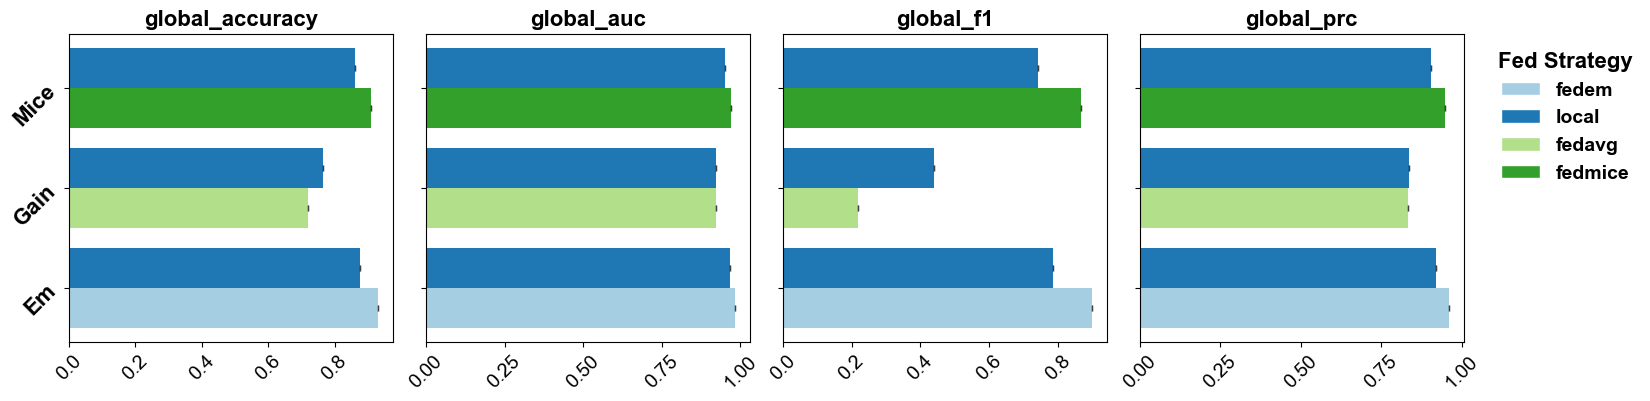

In [16]:
pipeline.plot_pipeline_results(
    metric_aspect = 'fed_pred_global',    
    plot_type = 'bar',
    save_path = "./plots/benchmark_fedpredglobal.pdf"  
)

In [17]:
data = pipeline.show_pipeline_results(
    format = 'dataframe',  
    metric_aspect = 'imp_quality',
    metric_name = 'rmse',
    show_round_variation = False
)

In [22]:
data.to_excel("./plots/benchmark_impquality.xlsx")